In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras_contrib.layers import CRF
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [7]:
from pythainlp.sentiment import sentiment

In [8]:
input_pbs = pd.read_csv('../../data/Thaipbs-tokenize.csv')

In [9]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)
# input_pbs.drop('Unnamed: 0.1', axis=1,inplace=True)
# input_pbs.drop('Unnamed: 1', axis=1, inplace=True)

In [10]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข...",11,43
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,...",9,46
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42


In [11]:
input_pbs['year-month'] = input_pbs['date'].apply(lambda x : x.split('/')[2]+'-'+x.split('/')[1])
input_pbs['month'] = input_pbs['date'].apply(lambda x : x.split('/')[1])
input_pbs['year'] = input_pbs['date'].apply(lambda x : x.split('/')[2])

In [12]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข...",11,43,2562-04,04,2562
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,...",9,46,2562-04,04,2562
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,04,2562
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,04,2562
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,04,2562


In [13]:
input_pbs['sentiment'] = input_pbs['headline'].apply(lambda x : sentiment(x))

In [14]:
input_pbs.to_csv('Thaipbs-notebook3.csv')

In [8]:
input_pbs = pd.read_csv('Thaipbs-notebook3.csv')

In [9]:
input_pbs.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
input_pbs.head()

,headline,date,DOW,time,view,category,tag,hour,numTag,token,numToken,numChar,year-month,month,year,sentiment
0,ฝุ่น PM2.5 : ทส.เตรียมตั้งศูนย์แก้ปัญหาหมอกควั...,05/04/2562,FRI,19:37,177,สิ่งแวดล้อม,"ฝุ่นเชียงใหม่,ฝุ่นPM2.5,ฝุ่นคลุมเมือง,เชียงใหม...",19,10,"ฝุ่น,PM,ทส.,เตรียม,ศูนย์,แก้,ปัญหา,หมอก,ควัน,ข...",11,43,2562-04,4,2562,pos
1,"เลือกตั้ง 2562 : ""เพื่อไทย"" เตรียมยื่น กกต.จัด...",05/04/2562,FRI,19:20,702,การเมือง,"เลือกตั้ง62,เพื่อ่ไทย,กกต.,นับคะแนน,ไทยพีบีเอส...",19,6,"เลือกตั้ง,2562,ไทย,เตรียม,ยื่น,กกต.,เลือกตั้ง,...",9,46,2562-04,4,2562,pos
2,เตรียมเอาผิด รพ.เอกชน 58 แห่งไม่ส่งข้อมูลราคายา,05/04/2562,FRI,19:18,583,สาธารณสุข,"ยา,เวชภัณฑ์ฯ,โรงพยาบาล,ค่าบริการทางการแพทย์,กร...",19,9,"เตรียม,รพ.เอกชน,ข้อมูล,ราคา,ยา",5,26,2562-04,4,2562,pos
3,ตั้งข้อสังเกตปลดล็อกกัญชา เอื้อนายทุนหรือไม่?,05/04/2562,FRI,19:16,928,อาชญากรรม,"กัญชา,มูลนิธิข้าวขวัญ,ThaiPBSnews",19,3,"ข้อ,สังเกต,ปลด,ล็อก,กัญชา,เอื้อ,ทุน",7,29,2562-04,4,2562,neg
4,"คำพิพากษาเต็ม ""เปรมชัย"" หลุดคดีครอบครองซากเสือดำ",05/04/2562,FRI,19:29,5163,สิ่งแวดล้อม,"เสือดำ,เปรมชัย,เขตรักษาพันธุ์สัตว์ป่าทุ่งใหญ่น...",19,5,"พิพากษา,เต็ม,เปรมชัย,หลุดคดี,ครอบครอง,ซาก,เสือดำ",7,42,2562-04,4,2562,neg


In [11]:
IQRval = input_pbs['view'].describe().loc['75%']-input_pbs['view'].describe().loc['25%']

In [12]:
input_pbs['view'].describe().loc['25%']

252.0

In [13]:
outlierMin = max(input_pbs['view'].describe().loc['25%'],0)
outlierMax = input_pbs['view'].describe().loc['75%']+1.5*IQRval
print(outlierMin,outlierMax)

252.0 3499.5


In [14]:
input_pbs = input_pbs[(input_pbs['view']<=outlierMax) & (input_pbs['view']>=outlierMin)]

In [15]:
input_pbs = input_pbs[input_pbs['year-month']< '2562-04' ]

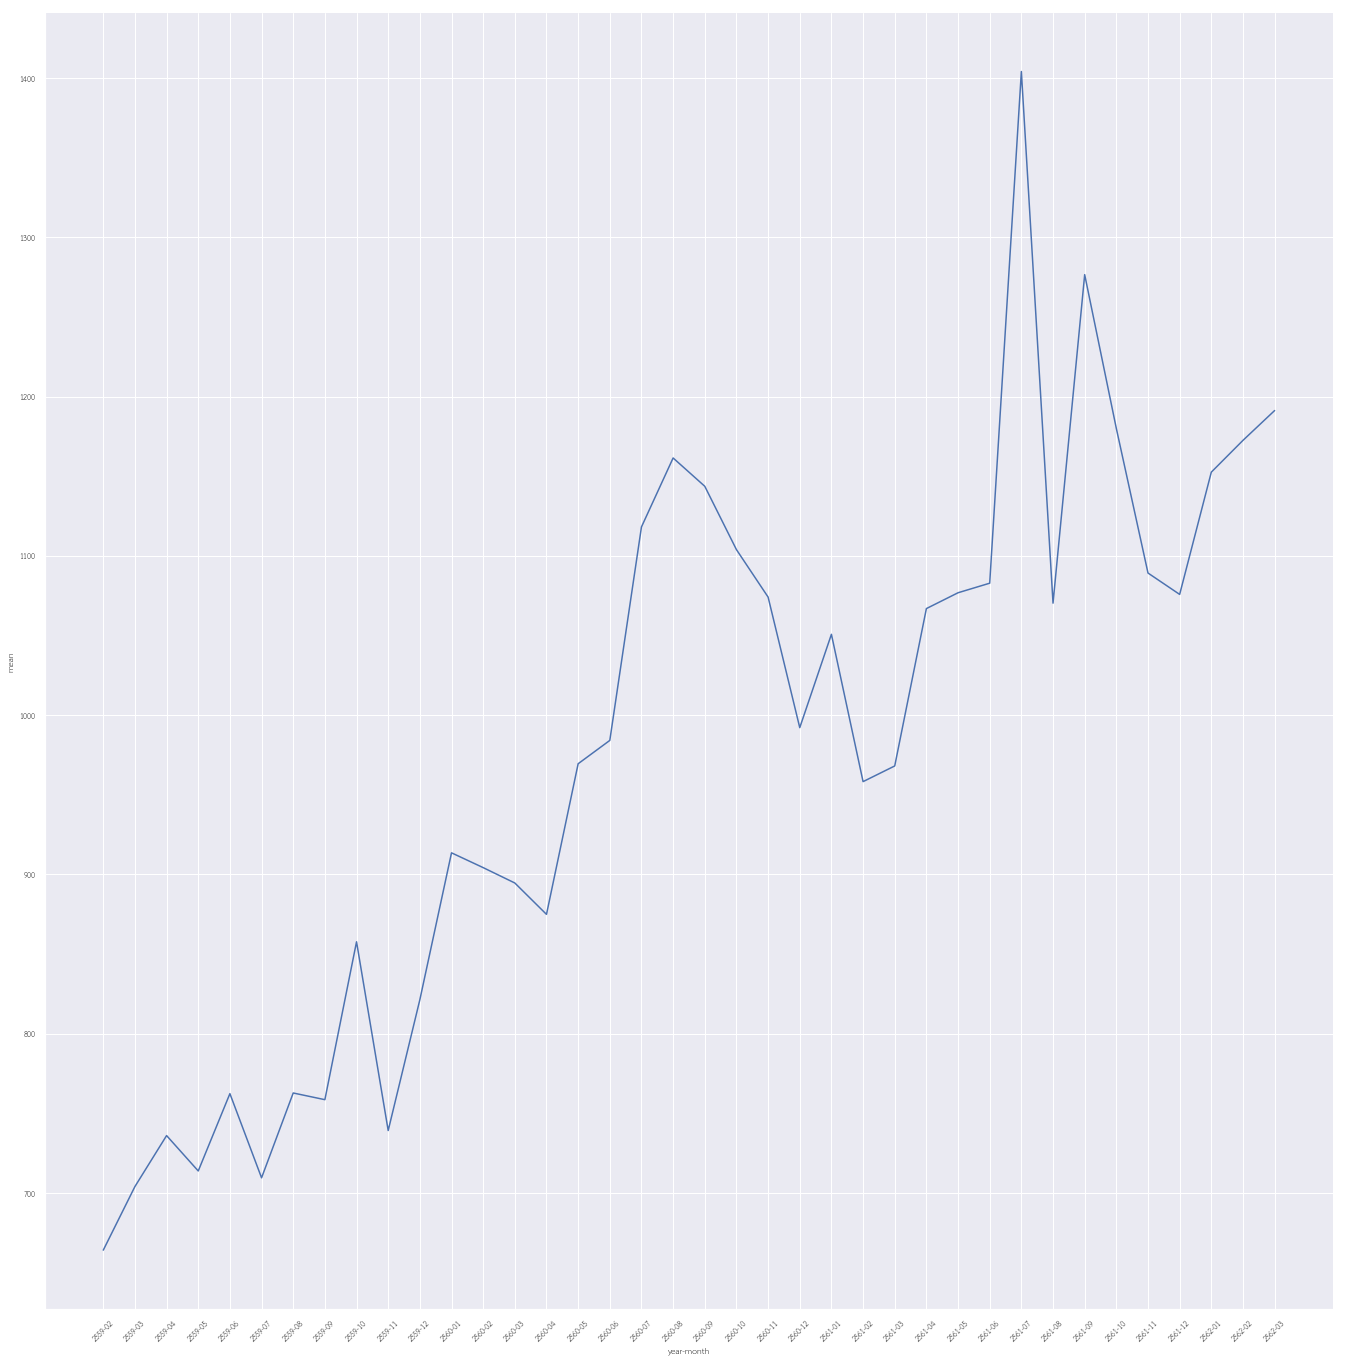

In [24]:
g = sns.relplot(x="year-month", y="mean", ci=None, kind="line", 
            data=input_pbs.groupby('year-month')['view'].describe().reset_index(),height=20)
g.set_xticklabels(rotation=45)

In [17]:
input_pbs.groupby('sentiment')['view'].describe()

,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
neg,11731.0,987.373540,769.507247,252.0,408.0,687.0,1323.0,3496.0
pos,5691.0,1009.107011,778.320101,252.0,415.0,715.0,1366.0,3496.0


In [18]:
input_pbs['numToken'].describe()

count    17422.000000
mean         8.385777
std          2.510162
min          1.000000
25%          7.000000
50%          8.000000
75%         10.000000
max         20.000000
Name: numToken, dtype: float64

In [19]:
input_pbs['view'].describe()

count    17422.000000
mean       994.472908
std        772.441988
min        252.000000
25%        410.000000
50%        696.000000
75%       1338.000000
max       3496.000000
Name: view, dtype: float64

In [20]:
MAXVIEW = input_pbs['view'].max()
MAXVIEW

3496

## Feature extraction

In [21]:
input_pbs_train, input_pbs_test = train_test_split(input_pbs, test_size=0.2,random_state=100)

/home/burin/.env/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


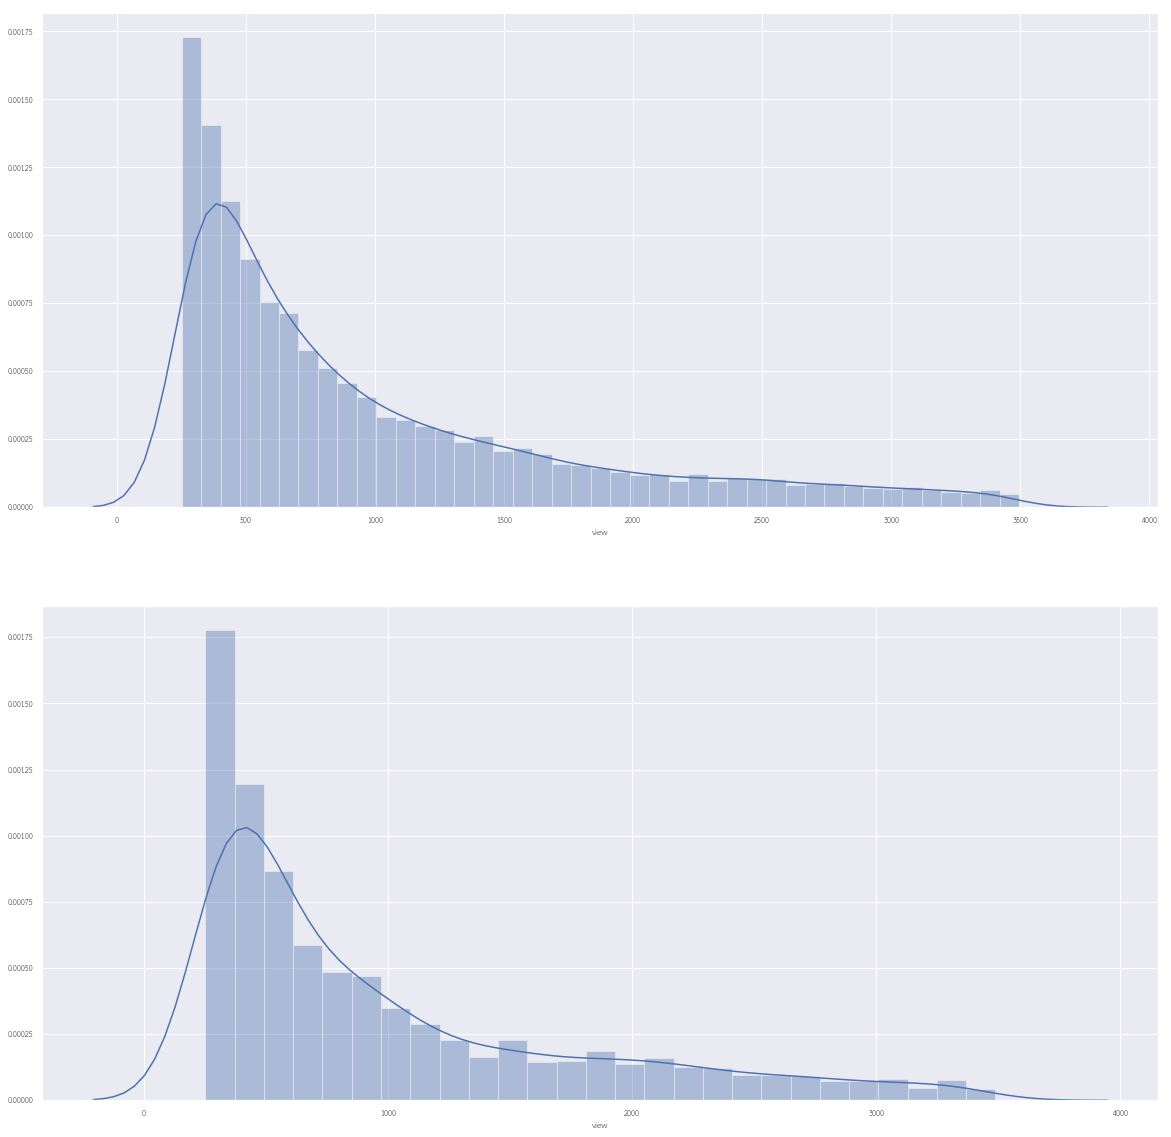

In [22]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_pbs_train['view'],ax=axarr[0])
sns.distplot(input_pbs_test['view'],ax=axarr[1])

## Bag of word feature

In [23]:
inputText_train = []
for sent in input_pbs_train['token']:
    inputText_train.append(sent.split(','))

In [24]:
inputText_test = []
for sent in input_pbs_test['token']:
    inputText_test.append(sent.split(','))

In [25]:
inputLabel_train = []
for view in input_pbs_train['view']:
    inputLabel_train.append(view/MAXVIEW)

In [26]:
inputLabel_test = []
for view in input_pbs_test['view']:
    inputLabel_test.append(view/MAXVIEW)

In [27]:
print(len(inputText_train),len(inputLabel_train))

13937 13937


In [28]:
print(len(inputText_test),len(inputLabel_test))

3485 3485


In [29]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//4]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [30]:
len(word_count)

3502

In [31]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [32]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [33]:
len(all_token)

3504

In [34]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [35]:
input_data_train = np.asarray(input_pbs_train['token'].str.split(','))
input_data_test = np.asarray(input_pbs_test['token'].str.split(','))

In [36]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [37]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

## Numerical feature

In [40]:
cs = MinMaxScaler()

In [41]:
trainContinuous = cs.fit_transform(input_pbs_train[['numToken','numChar']])
testContinuous = cs.fit_transform(input_pbs_test[['numToken','numChar']])

/home/burin/.env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/burin/.env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Cetagorial feature

In [42]:
lb = preprocessing.LabelBinarizer()

In [43]:
zipBinarizer = lb.fit(input_pbs["DOW"])
trainCategorical_dow = zipBinarizer.transform(input_pbs_train["DOW"])
testCategorical_dow = zipBinarizer.transform(input_pbs_test["DOW"])
zipBinarizer = lb.fit(input_pbs["month"])
trainCategorical_month = zipBinarizer.transform(input_pbs_train["month"])
testCategorical_month = zipBinarizer.transform(input_pbs_test["month"])
zipBinarizer = lb.fit(input_pbs["year"])
trainCategorical_year = zipBinarizer.transform(input_pbs_train["year"])
testCategorical_year = zipBinarizer.transform(input_pbs_test["year"])
zipBinarizer = lb.fit(input_pbs["hour"])
trainCategorical_hour = zipBinarizer.transform(input_pbs_train["hour"])
testCategorical_hour = zipBinarizer.transform(input_pbs_test["hour"])
zipBinarizer = lb.fit(input_pbs["category"])
trainCategorical_category = zipBinarizer.transform(input_pbs_train["category"])
testCategorical_category = zipBinarizer.transform(input_pbs_test["category"])
zipBinarizer = lb.fit(input_pbs["sentiment"])
trainCategorical_sentiment = zipBinarizer.transform(input_pbs_train["sentiment"])
testCategorical_sentiment = zipBinarizer.transform(input_pbs_test["sentiment"])

## Concat feature

In [44]:
x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
                     trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
                    testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [158]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [159]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## Prepare data for Keras

In [45]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [46]:
x_train.shape

(13937, 3571)

In [47]:
print("train size",x_train.shape)
print("test size",x_test.shape)

train size (13937, 3571)
test size (3485, 3571)


In [48]:
y_train = inputLabel_train
y_train = np.asarray(y_train).reshape(-1,1)
y_test = inputLabel_test
y_test = np.asarray(y_test).reshape(-1,1)

In [49]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [50]:
print("train size",len(y_train))
print("test size",len(y_test))

train size 13937
test size 3485


## Create Model

In [64]:
def create_model():
#     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
    input1 = Input(shape=(x_train.shape[1],1))
    x = LSTM(32)(input1)
#     x = Dense(32, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(8, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.3)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    x = Dense(1,activation='linear')(x)
    model = Model(inputs=input1, outputs=x)
    adam  = Adam(lr=0.001)
    model.compile(optimizer=adam,  loss='mean_absolute_percentage_error')
    
    return model


In [65]:
model = create_model()
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3571, 1)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16)                64        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0   

In [66]:
weight_path='./model_3.h5'
callbacks_list = [
        ModelCheckpoint(
            weight_path,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [67]:
x_train.shape

(13937, 3571)

In [68]:
model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, 
          batch_size=1024 ,epochs=50, verbose=1, validation_split=0.2,callbacks=callbacks_list)

Train on 11149 samples, validate on 2788 samples
Epoch 1/50
11149/11149 [==============================] - 87s 8ms/step - loss: 369.3446 - val_loss: 75.7081

Epoch 00001: val_loss improved from inf to 75.70806, saving model to ./model_3.h5
Epoch 2/50
11149/11149 [==============================] - 85s 8ms/step - loss: 326.3660 - val_loss: 186.7051

Epoch 00002: val_loss did not improve from 75.70806
Epoch 3/50
11149/11149 [==============================] - 85s 8ms/step - loss: 302.8052 - val_loss: 128.8988

Epoch 00003: val_loss did not improve from 75.70806
Epoch 4/50
11149/11149 [==============================] - 86s 8ms/step - loss: 272.6637 - val_loss: 62.6001

Epoch 00004: val_loss improved from 75.70806 to 62.60008, saving model to ./model_3.h5
Epoch 5/50
11149/11149 [==============================] - 87s 8ms/step - loss: 245.4260 - val_loss: 56.8161

Epoch 00005: val_loss improved from 62.60008 to 56.81605, saving model to ./model_3.h5
Epoch 6/50
11149/11149 [====================

KeyboardInterrupt: 

In [69]:
weight_model='./model_3.h5'
model = create_model()
model.load_weights(weight_model)
# model._make_predict_function()
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3571, 1)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 16)                64        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0   

## Evaluate Model

In [72]:
y_pred = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1))

In [73]:
y_pred2 = y_pred.clip(min=0)

In [75]:
def evaluate(preds, testY):
    diff = preds.flatten() - testY
    percentDiff = (diff / testY) * 100
    absPercentDiff = np.abs(percentDiff)
    mean = np.mean(absPercentDiff)
    std = np.std(absPercentDiff)
    print(mean,std)

In [76]:
evaluate(y_pred,y_test)

51.92400214296154 32.88627909525119


In [77]:
evaluate(y_pred2,y_test)

51.92400214296154 32.88627909525119


In [78]:
for i in range(50,100):
    print(y_test[i],y_pred[i])
    print(y_test[i]*MAXVIEW,y_pred[i]*MAXVIEW)

[0.08924485] [0.1685662]
[312.] [589.30743]
[0.66361556] [0.15458578]
[2320.] [540.4319]
[0.09553776] [0.14309043]
[334.] [500.24414]
[0.51144165] [0.14036839]
[1788.] [490.72787]
[0.26916476] [0.16871586]
[941.] [589.8307]
[0.0860984] [0.16868436]
[301.] [589.7205]
[0.13072082] [0.16836858]
[457.] [588.6166]
[0.10411899] [0.138821]
[364.] [485.31824]
[0.24370709] [0.14100881]
[852.] [492.9668]
[0.10297483] [0.2720481]
[360.] [951.0801]
[0.08323799] [0.14084682]
[291.] [492.40048]
[0.1687643] [0.1686841]
[590.] [589.7196]
[0.07322654] [0.13663152]
[256.] [477.6638]
[0.44364989] [0.13834077]
[1551.] [483.63934]
[0.19450801] [0.16838032]
[680.] [588.6576]
[0.1965103] [0.14782745]
[687.] [516.80475]
[0.1201373] [0.15447164]
[420.] [540.03284]
[0.09467963] [0.14240512]
[331.] [497.8483]
[0.34124714] [0.14298756]
[1193.] [499.88452]
[0.14473684] [0.14357188]
[506.] [501.9273]
[0.14502288] [0.16072544]
[507.] [561.8962]
[0.42620137] [0.27205595]
[1490.] [951.1076]
[0.12185355] [0.13849387]
[